In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_blobs, make_circles

## Example : Synthetic blobs data clustering

In [144]:
x, y = make_blobs(n_samples=100, centers=3, cluster_std=0.6, random_state=42)
x = StandardScaler().fit_transform(x)

In [145]:
kmeans = KMeans(n_clusters=3)

In [146]:
labels = kmeans.fit_predict(x)

C:\Users\TEK-UP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [147]:
labels

array([1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0], dtype=int32)

In [148]:
kmeans.inertia_

2.0331401136396376

In [149]:
centroids = kmeans.cluster_centers_

In [150]:
centroids

array([[-0.19785152,  1.15959663],
       [-1.10904724, -1.27037557],
       [ 1.31289426,  0.07563964]])

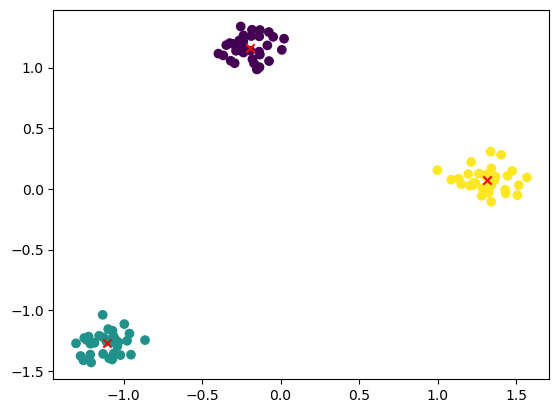

In [154]:
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')

## Irid Dataset Clustering

In [37]:
from sklearn.datasets import load_iris, load_diabetes

In [38]:
x = load_iris().data

In [77]:
x = StandardScaler().fit_transform(x)

In [40]:
k_range = range(1, 11)
inertia = list()

for k in k_range:
    kmeans_iris = KMeans(n_clusters=k)
    kmeans_iris.fit(x)
    inertia.append(kmeans_iris.inertia_)

C:\Users\TEK-UP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TEK-UP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TEK-UP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TEK-UP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

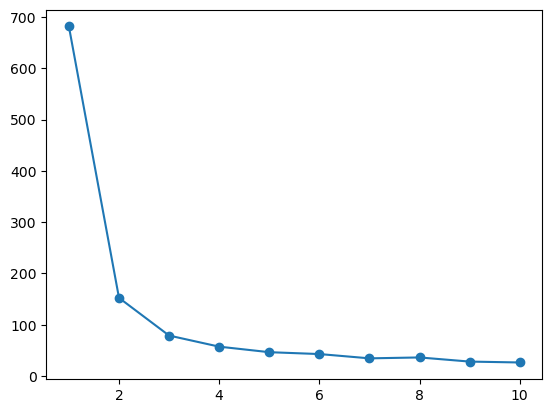

In [42]:
plt.plot(k_range, inertia, marker = 'o')

In [43]:
kmeans_iris = KMeans(n_clusters=3)

In [46]:
labels = kmeans_iris.fit_predict(x)
centroids = kmeans_iris.cluster_centers_

C:\Users\TEK-UP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


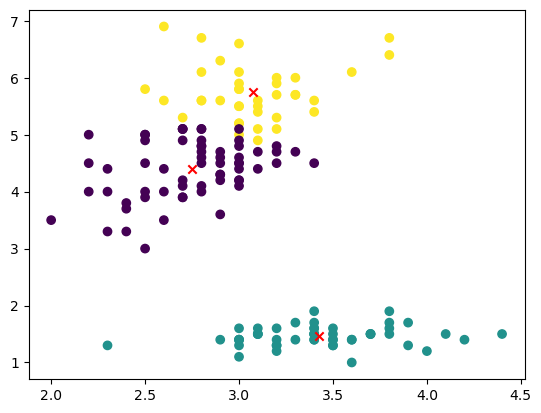

In [49]:
plt.scatter(x[: , 1], x[:, 2], c=labels)
plt.scatter(centroids[: , 1], centroids[:, 2], c='red', marker = 'x')

In [51]:
from sklearn.decomposition import PCA

In [89]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
centroids_pca = pca.transform(centroids)

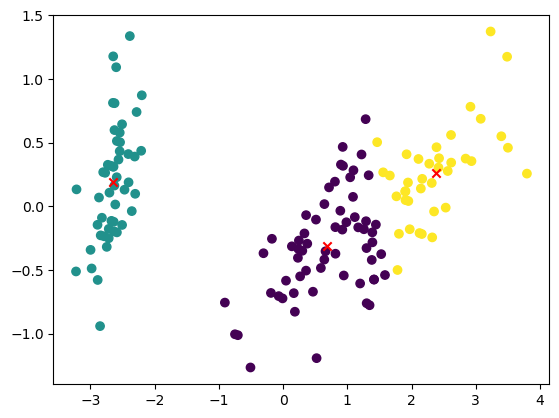

In [91]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels)
plt.scatter(centroids_pca[: , 0], centroids_pca[:, 1], c='red', marker = 'x')

In [93]:
import pandas as pd
data_iris = pd.DataFrame(x, columns=load_iris().feature_names)

In [95]:
data_iris['cluster'] = labels

In [97]:
data_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [100]:
data_iris.groupby(['cluster']).agg(['min', 'max', 'mean'])

sepal length (cm)                sepal width (cm)                 \
                      min  max      mean              min  max      mean   
cluster                                                                    
0                     4.9  7.0  5.901613              2.0  3.4  2.748387   
1                     4.3  5.8  5.006000              2.3  4.4  3.428000   
2                     6.1  7.9  6.850000              2.5  3.8  3.073684   

        petal length (cm)                petal width (cm)                 
                      min  max      mean              min  max      mean  
cluster                                                                   
0                     3.0  5.1  4.393548              1.0  2.4  1.433871  
1                     1.0  1.9  1.462000              0.1  0.6  0.246000  
2                     4.9  6.9  5.742105              1.4  2.5  2.071053